# handling MNIST dataset 
Take image and create classification model to classify the image in 10 different classes 

``` 
First create basic neural network with 28x28 input and 10 output layers - no hidden layers

In [1]:
from tensorflow import keras 
import tensorflow as tf 
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
# create train and validation set 
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full)

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

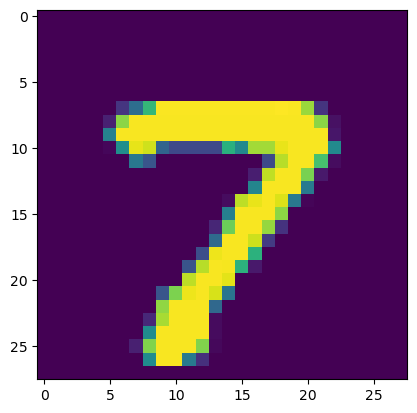

In [5]:
plt.imshow(X_train[0])

In [6]:
y_train[0]

np.uint8(7)

In [7]:
# scale the training set and convert to float 
X_train = X_train/255.0 
X_test = X_test/255.0 
X_val = X_val/255.0

In [8]:
X_train[0].shape

(28, 28)

In [9]:
X_train[0].flatten()

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [10]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [11]:
# Create the model with 784 input layers and 10 output layers (simple ANN)
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

/Users/rohitabhishek/miniconda3/envs/mlenv/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
import os 
import time 

def get_run_logdir(root_logdir="tensorboard_logs"):
    run_id = time.strftime(f"%Y%m%d%H%M%S")
    return os.path.join(root_logdir, run_id)

In [13]:
FILE_NAME = "output/video16/no_hidden_estimator.keras"
log_dir = get_run_logdir()

# create checkpoints - one to save the best model and another one with early stopping 
early_stopping_chkp = keras.callbacks.EarlyStopping(patience=25,
                                                    restore_best_weights=True)

best_estimator_chkp = keras.callbacks.ModelCheckpoint(FILE_NAME, save_best_only=True)

# create tensorboard checkpoint 
tensorboard_chkp = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [14]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[best_estimator_chkp, early_stopping_chkp, tensorboard_chkp])

Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1s 849us/step - accuracy: 0.7889 - loss: 0.8018 - val_accuracy: 0.9097 - val_loss: 0.3321
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1s 765us/step - accuracy: 0.9089 - loss: 0.3309 - val_accuracy: 0.9177 - val_loss: 0.2964
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1s 776us/step - accuracy: 0.9172 - loss: 0.3011 - val_accuracy: 0.9207 - val_loss: 0.2836
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1s 764us/step - accuracy: 0.9213 - loss: 0.2875 - val_accuracy: 0.9223 - val_loss: 0.2772
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1s 741us/step - accuracy: 0.9244 - loss: 0.2791 - val_accuracy: 0.9240 - val_loss: 0.2736
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1s 753us/step - accuracy: 0.9257 - loss: 0.2732 - val_accuracy: 0.9254 - val_loss: 0.2713
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1s 755us/step - accuracy: 0.9270 - loss: 0.2687 - val_accuracy: 0.9255 - val_loss: 0.2698
Epoch 8/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1s 758us/step - accuracy: 

In [15]:
# get the best model and evaluate on test data set 
best_model = keras.models.load_model(FILE_NAME)

In [16]:
# evaluate accuracy score on test dataset - gives loss, accuracy
best_model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - accuracy: 0.9161 - loss: 0.3030


[0.2659457325935364, 0.9266999959945679]

```
Training Accuracy: 93.73% 
Validation Accuracy: 92.17% 
Testing Accuracy: 92.48% 

Not bad! Lets check the confusion matrix

In [17]:
# Make predictions using this model
y_pred = best_model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step


In [18]:
y_pred[:10]

array([[4.9460937e-07, 2.0127689e-12, 9.1506485e-07, 2.0115559e-03,
        1.8490611e-07, 1.9985417e-05, 8.0954002e-12, 9.9766552e-01,
        1.5923326e-05, 2.8528922e-04],
       [2.0480476e-04, 1.6794883e-06, 9.9486393e-01, 7.1666305e-05,
        1.5825249e-14, 1.7256589e-03, 3.1047040e-03, 1.6361263e-18,
        2.7568916e-05, 1.9833973e-15],
       [7.0939382e-07, 9.8559034e-01, 8.6014485e-03, 1.8043127e-03,
        7.0452814e-05, 5.4507144e-04, 6.6717825e-04, 1.7229684e-04,
        2.3997489e-03, 1.4837740e-04],
       [9.9976695e-01, 3.3839283e-12, 8.0492340e-05, 1.7468263e-06,
        1.3211930e-08, 4.1258638e-05, 9.1383212e-05, 2.5673260e-06,
        9.8300570e-06, 5.8208507e-06],
       [2.1354019e-04, 3.8876411e-08, 1.0869352e-03, 1.1719089e-05,
        9.7641164e-01, 8.1706195e-05, 1.1011796e-03, 1.6788919e-03,
        1.9439756e-03, 1.7470414e-02],
       [5.7280687e-08, 9.9369729e-01, 1.3076536e-03, 8.7459158e-04,
        5.5973910e-06, 2.8948756e-05, 1.1186548e-05, 1.89

```
As we see the data returned from neural network is scores from each neuron. lets use np.argmax() fuction to pick the best score 


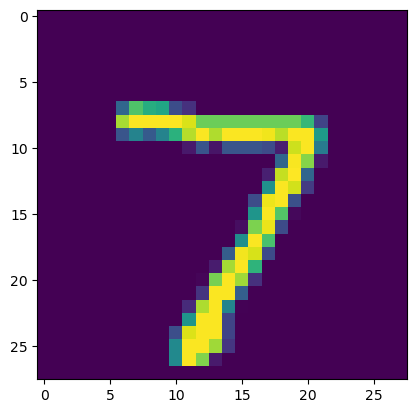

In [19]:
plt.imshow(X_test[0])

In [20]:
np.argmax(y_pred[0])

np.int64(7)

``` 
Looks like the model is able to predict 7 correctly. Lets build confusion matrix

In [21]:
len(y_pred)

10000

In [22]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [23]:
y_pred_values = [np.argmax(y_pred[i]) for i in range(len(y_pred))]
y_pred_values

[np.int64(7),
 np.int64(2),
 np.int64(1),
 np.int64(0),
 np.int64(4),
 np.int64(1),
 np.int64(4),
 np.int64(9),
 np.int64(6),
 np.int64(9),
 np.int64(0),
 np.int64(6),
 np.int64(9),
 np.int64(0),
 np.int64(1),
 np.int64(5),
 np.int64(9),
 np.int64(7),
 np.int64(3),
 np.int64(4),
 np.int64(9),
 np.int64(6),
 np.int64(6),
 np.int64(5),
 np.int64(4),
 np.int64(0),
 np.int64(7),
 np.int64(4),
 np.int64(0),
 np.int64(1),
 np.int64(3),
 np.int64(1),
 np.int64(3),
 np.int64(6),
 np.int64(7),
 np.int64(2),
 np.int64(7),
 np.int64(1),
 np.int64(2),
 np.int64(1),
 np.int64(1),
 np.int64(7),
 np.int64(4),
 np.int64(2),
 np.int64(3),
 np.int64(5),
 np.int64(1),
 np.int64(2),
 np.int64(4),
 np.int64(4),
 np.int64(6),
 np.int64(3),
 np.int64(5),
 np.int64(5),
 np.int64(6),
 np.int64(0),
 np.int64(4),
 np.int64(1),
 np.int64(9),
 np.int64(5),
 np.int64(7),
 np.int64(8),
 np.int64(9),
 np.int64(2),
 np.int64(7),
 np.int64(4),
 np.int64(2),
 np.int64(4),
 np.int64(3),
 np.int64(0),
 np.int64(7),
 np.in

In [24]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_values)

In [25]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    1,    2,    0,    5,    6,    3,    1,    1],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   5,    8,  924,   17,    6,    4,   12,   11,   41,    4],
       [   3,    0,   18,  922,    1,   24,    2,   10,   22,    8],
       [   1,    2,    5,    2,  918,    0,    8,    6,    9,   31],
       [   8,    4,    3,   39,   12,  776,   12,    2,   30,    6],
       [  10,    3,    7,    1,    7,   12,  915,    1,    2,    0],
       [   1,    7,   23,    3,    5,    1,    0,  954,    3,   31],
       [   7,    9,    6,   24,    9,   27,    8,    9,  867,    8],
       [   9,    7,    1,   11,   32,    5,    0,   20,    8,  916]],
      dtype=int32)>

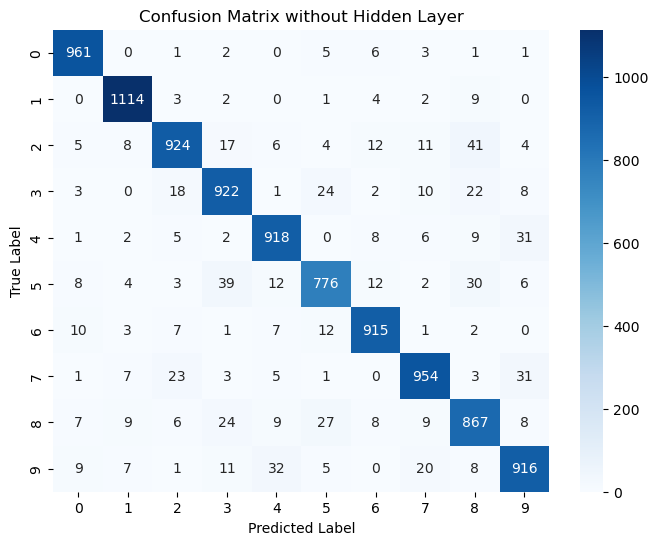

In [26]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix without Hidden Layer')
plt.show()

``` 
Add hidden layers 

In [27]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [28]:
# Create the model with 784 input layers and 10 output layers (simple ANN)
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))

# add 100 neurons - random selected value 
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

/Users/rohitabhishek/miniconda3/envs/mlenv/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
FILE_NAME = "output/video16/one_hidden_estimator.keras"
log_dir = get_run_logdir()

# create checkpoints - one to save the best model and another one with early stopping 
early_stopping_chkp = keras.callbacks.EarlyStopping(patience=25,
                                                    restore_best_weights=True)

best_estimator_chkp = keras.callbacks.ModelCheckpoint(FILE_NAME, save_best_only=True)

# create tensorboard checkpoint
tensorboard_chkp = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [30]:
# use same callbacks as previous model 
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[best_estimator_chkp, early_stopping_chkp, tensorboard_chkp])

Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8647 - loss: 0.4888 - val_accuracy: 0.9495 - val_loss: 0.1745
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9523 - loss: 0.1641 - val_accuracy: 0.9627 - val_loss: 0.1290
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9667 - loss: 0.1123 - val_accuracy: 0.9678 - val_loss: 0.1098
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9752 - loss: 0.0834 - val_accuracy: 0.9709 - val_loss: 0.1005
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9809 - loss: 0.0640 - val_accuracy: 0.9722 - val_loss: 0.0982
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9855 - loss: 0.0490 - val_accuracy: 0.9718 - val_loss: 0.0999
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9896 - loss: 0.0372 - val_accuracy: 0.9728 - val_loss: 0.1019
Epoch 8/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9931 - loss: 0

In [31]:
best_model = keras.models.load_model(FILE_NAME)

In [32]:
best_model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - accuracy: 0.9681 - loss: 0.1041


[0.08971838653087616, 0.9728999733924866]

In [33]:
y_pred = best_model.predict(X_test)
y_pred_values = [np.argmax(i) for i in y_pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step


``` 
Training Accuracy: 99.95% 
Validation Accuracy: 97.30% 
Test Accuracy: 92.44% 

Much better than last time where accuracy score was around 92% 

In [34]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_values)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    2,    1,    0,    1,    5,    2,    1,    1],
       [   0, 1125,    3,    1,    0,    1,    2,    0,    3,    0],
       [   5,    2,  998,    4,    4,    1,    2,    8,    7,    1],
       [   1,    1,    6,  984,    0,    5,    0,    3,    4,    6],
       [   3,    1,    4,    0,  965,    0,    3,    2,    1,    3],
       [   3,    0,    0,   15,    3,  860,    7,    1,    3,    0],
       [   5,    3,    0,    1,    3,    2,  942,    1,    1,    0],
       [   1,    7,    8,    1,    3,    0,    0,  997,    3,    8],
       [   6,    1,    2,    6,    5,    9,    5,    6,  929,    5],
       [   2,    4,    1,    8,   19,    5,    1,    6,    1,  962]],
      dtype=int32)>

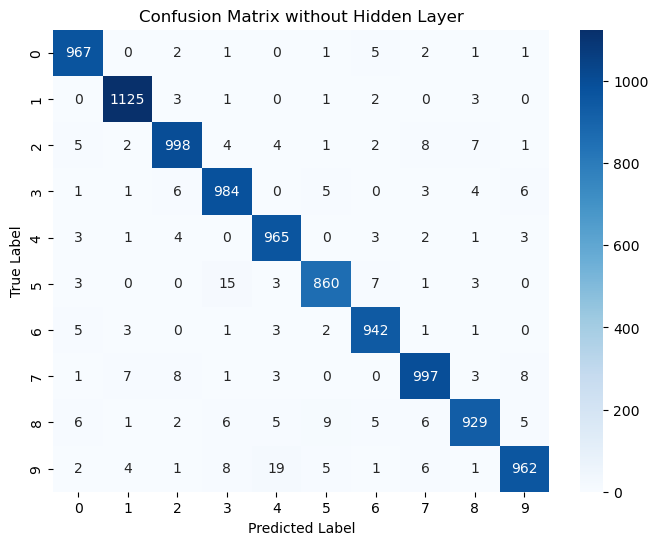

In [35]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix without Hidden Layer')
plt.show()

``` 
This is much better. Over 39 2 were misclassified as 8 in previous model is now reduced to 15 
Can we do better? - Let's try with second hidden layer. First layer where was able to pick straight lines easily - may be model will be able to predict with curvy lines 

In [36]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [37]:
# Create the model with 784 input layers and 10 output layers (simple ANN)
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))

# add 100 neurons - random selected value 
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

/Users/rohitabhishek/miniconda3/envs/mlenv/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [38]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [39]:
FILE_NAME = "output/video16/two_hidden_estimator.keras"
log_dir = get_run_logdir()

# create checkpoints - one to save the best model and another one with early stopping 
early_stopping_chkp = keras.callbacks.EarlyStopping(patience=25,
                                                    restore_best_weights=True)

best_estimator_chkp = keras.callbacks.ModelCheckpoint(FILE_NAME, save_best_only=True)

# create tensorboard checkpoint 
tensorboard_chkp = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [40]:
# use same callbacks as previous model 
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[best_estimator_chkp, early_stopping_chkp, tensorboard_chkp])

Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8516 - loss: 0.4901 - val_accuracy: 0.9575 - val_loss: 0.1407
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9600 - loss: 0.1357 - val_accuracy: 0.9655 - val_loss: 0.1135
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9722 - loss: 0.0911 - val_accuracy: 0.9680 - val_loss: 0.1081
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9797 - loss: 0.0664 - val_accuracy: 0.9648 - val_loss: 0.1214
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9853 - loss: 0.0482 - val_accuracy: 0.9677 - val_loss: 0.1240
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9880 - loss: 0.0374 - val_accuracy: 0.9677 - val_loss: 0.1302
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9902 - loss: 0.0312 - val_accuracy: 0.9685 - val_loss: 0.1278
Epoch 8/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9926 - loss: 0

In [41]:
best_model = keras.models.load_model(FILE_NAME)

In [42]:
best_model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.9654 - loss: 0.1091


[0.10129287093877792, 0.968500018119812]

```
Training Accuracy: 99.8% 
Validation Accuracy: 97.33% 
Testing Accuracy: 97.47% 

Much better than previous model where the testing accuracy was around 92% 

In [43]:
y_pred = best_model.predict(X_test)
y_pred_values = [np.argmax(i) for i in y_pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step


In [44]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_values)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    0,    1,    1,    0,    1,    5,    1,    2,    0],
       [   0, 1122,    2,    3,    0,    1,    4,    1,    2,    0],
       [   7,    1,  980,   13,    9,    1,    6,    6,    9,    0],
       [   2,    0,    1,  988,    0,    4,    0,    8,    5,    2],
       [   3,    1,    0,    1,  964,    1,    6,    2,    1,    3],
       [   4,    0,    0,   22,    2,  853,    6,    0,    3,    2],
       [   4,    2,    0,    2,    2,    6,  940,    0,    2,    0],
       [   0,    6,    7,    3,    1,    1,    1,  993,    1,   15],
       [   4,    2,    1,   10,    7,   13,    7,    3,  919,    8],
       [   4,    4,    0,    6,   24,    5,    2,    4,    3,  957]],
      dtype=int32)>

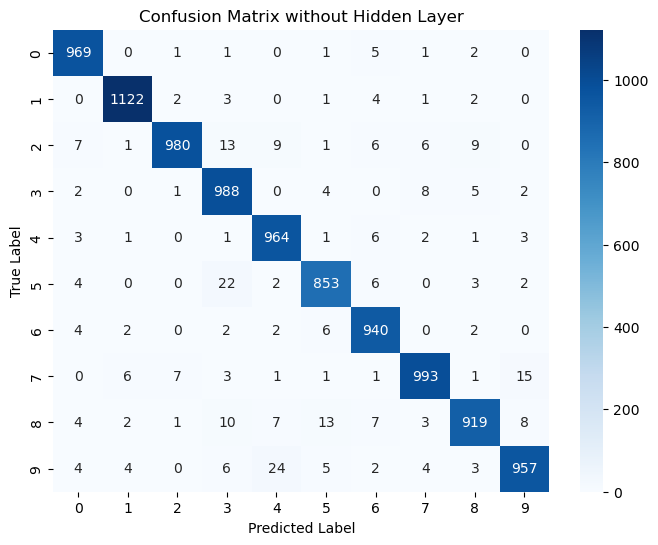

In [45]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix without Hidden Layer')
plt.show()

In [46]:
X_val[0].shape

(28, 28)

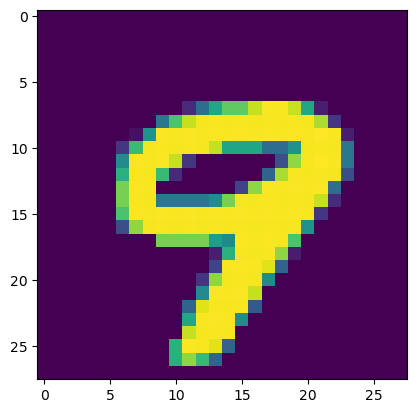

In [47]:
plt.imshow(X_val[0])

In [48]:
[np.array(X_val[0]).reshape(1, 28, 28, 1)]

[array([[[[0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ]],
 
         [[0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.        ],
          [0.

In [49]:
np.argmax(best_model.predict([np.array(X_val[0]).reshape(1, 28, 28, 1)]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


/Users/rohitabhishek/miniconda3/envs/mlenv/lib/python3.11/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer
Received: inputs=('Tensor(shape=(1, 28, 28, 1))',)
  warnings.warn(msg)


np.int64(9)

In [50]:
# launch tensorboard to evaluate the outcome 